<a href="https://colab.research.google.com/github/SiddaDhanuja/SLASHMARKINTERNSHIP/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
import numpy as np
import pandas as pd

In [30]:
data = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t' , quoting=3)


In [31]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [32]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
corpus =[]
for i in range(0,1000):
   review =re.sub(pattern='[^a-zA-Z]',repl=' ', string=data['Review'][i])

   review = review.lower()
   review_words = review.split()
   review_words = [word for word in review_words if not word in set(stopwords.words('english'))]

   ps= PorterStemmer()
   review =[ps.stem(word) for word in review_words]

   review = ' '.join(review)
   corpus.append(review)

In [35]:
corpus[:1500]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh']

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X =cv.fit_transform(corpus).toarray()
y = data.iloc[:,1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.20, random_state=0)

In [37]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((5, 28), (2, 28), (5,), (2,))

In [38]:
from sklearn.naive_bayes import MultinomialNB

classifier =MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [39]:
y_pred = classifier.predict(X_test)

y_pred

array([0, 0])

In [40]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

score1 =accuracy_score(y_test,y_pred)
score2 = accuracy_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)

print("---------SCORES--------")
print("Accuracy score is {}%".format(round(score1*100,3)))
print("Precision score is {}%".format(round(score2*100,3)))
print("recall score is {}%".format(round(score3*100,3)))

---------SCORES--------
Accuracy score is 100.0%
Precision score is 100.0%
recall score is 0.0%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [42]:
cm

array([[2]])

Text(95.72222222222221, 0.5, 'Actual Values')

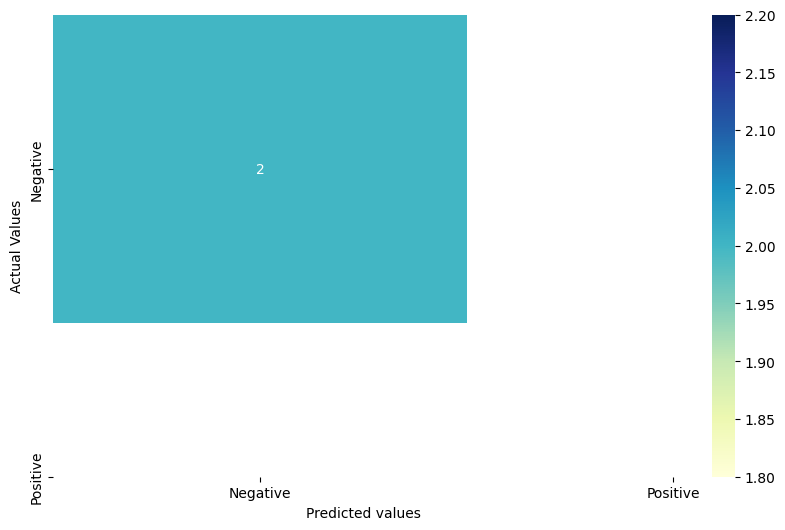

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize =(10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')

In [44]:
from ssl import ALERT_DESCRIPTION_HANDSHAKE_FAILURE
best_accuracy =0.0
alpha_val =0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier =MultinomialNB(alpha=i)
  temp_classifier.fit(X_train,y_train)
  temp_y_pred =temp_classifier.predict(X_test)
  score = accuracy_score(y_test,temp_y_pred)
  print("Accuracy Score for alpha={} is {}%".format(round(i,1),round(score*100,3)))
  if score>best_accuracy:
     best_accuracy=score
     alpha_val =i
print('----------------------------------------------------')
print("The Best Accuracy Score is {}% with alpha value as {}".format(round(best_accuracy*100, 2), round(alpha_val, 1)))

Accuracy Score for alpha=0.1 is 100.0%
Accuracy Score for alpha=0.2 is 100.0%
Accuracy Score for alpha=0.3 is 100.0%
Accuracy Score for alpha=0.4 is 100.0%
Accuracy Score for alpha=0.5 is 100.0%
Accuracy Score for alpha=0.6 is 100.0%
Accuracy Score for alpha=0.7 is 100.0%
Accuracy Score for alpha=0.8 is 100.0%
Accuracy Score for alpha=0.9 is 100.0%
Accuracy Score for alpha=1.0 is 100.0%
----------------------------------------------------
The Best Accuracy Score is 100.0% with alpha value as 0.1


In [45]:

classifier =MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

In [46]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)

    temp = cv.transform([final_review]).toarray()
    return classifier.predict(temp)

In [47]:
sample_review ='The food is really bad.'

if predict_sentiment(sample_review):
  print("Positive review")

else:
  print("Negative review")

Positive review


In [48]:
sample_review ='Food was pretty bad and the service was very slow'

if predict_sentiment(sample_review):
  print(" Positive review")

else:
  print(" Negative review")

 Positive review


In [49]:
sample_review ='The food  was absolutely wonderful,from preparation to presentation, very pleasing.'

if predict_sentiment(sample_review):
  print("This is a Positive review")

else:
  print("This is a Negative review")

This is a Positive review


In [50]:
sample_review ='food averag'

if predict_sentiment(sample_review):
  print("This is a Positive review")

else:
  print("This is a Negative review")


This is a Positive review
